# Data Preprocessing & ready the  datset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Specify the path to your dataset using an absolute path
data_train_path = os.path.abspath("/content/drive/MyDrive/fish_dataset/training")
data_test_path = os.path.abspath("/content/drive/MyDrive/fish_dataset/testing")
data_val_path = os.path.abspath("/content/drive/MyDrive/fish_dataset/validation")

## set our images in similar size(fixed width & fixed height

In [ ]:
img_width = 224
img_height = 224

## The tf.keras.utils.image_dataset_from_directory function is a convenient way to load image data from a directory structure and convert it into a TensorFlow dataset, which can be used for training machine learning models. This function handles various aspects such as reading images, resizing, shuffling, and batching, making it suitable for image classification tasks.

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1640 files belonging to 9 classes.


## Show class_Name by this function and keep that function in a variable for later use

In [ ]:
data_cat=data_train.class_names

In [ ]:
data_cat

['Kholse',
 'Koi fish',
 'Pabda',
 'Puti',
 'Shing',
 'Shrimp',
 'Taki',
 'Telapia',
 'Tengra']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 972 files belonging to 9 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                       image_size=(img_height, img_width),
                                                       shuffle=False,
                                                       batch_size=32,
                                                       validation_split=False)

Found 592 files belonging to 9 classes.


## Let's print some images from training dataset

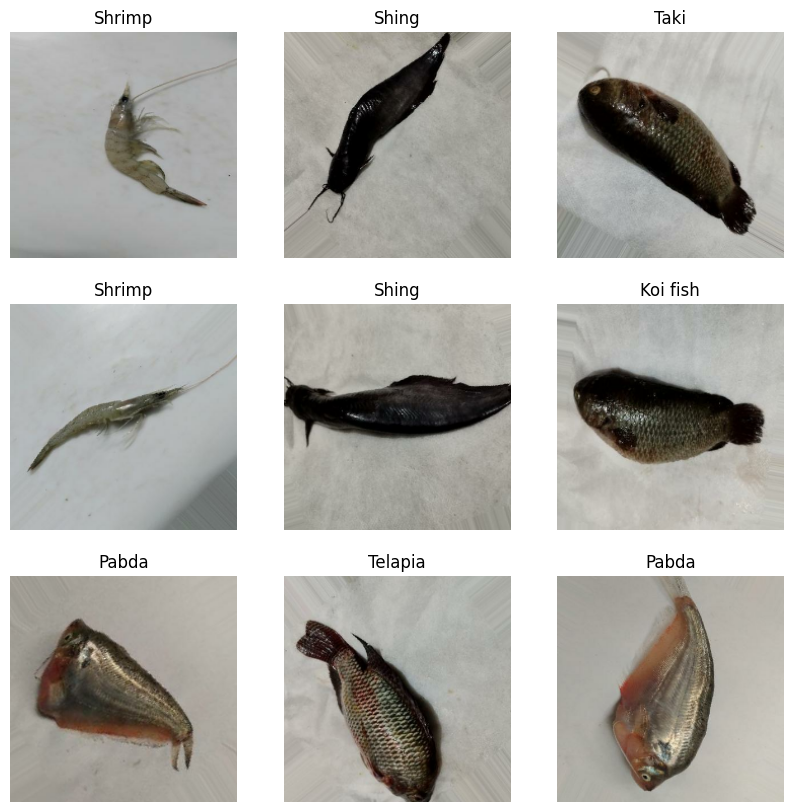

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

# model creation

## create layers within model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

## already model has been created now model compiling

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
52/52 [==============================] - 433s 8s/step - loss: 2.5285 - accuracy: 0.3829 - val_loss: 0.9328 - val_accuracy: 0.6379
Epoch 2/25
52/52 [==============================] - 137s 3s/step - loss: 0.5868 - accuracy: 0.8018 - val_loss: 0.4406 - val_accuracy: 0.8272
Epoch 3/25
52/52 [==============================] - 123s 2s/step - loss: 0.2598 - accuracy: 0.9232 - val_loss: 0.5230 - val_accuracy: 0.7840
Epoch 4/25
52/52 [==============================] - 137s 3s/step - loss: 0.1484 - accuracy: 0.9555 - val_loss: 0.3666 - val_accuracy: 0.8765
Epoch 5/25
52/52 [==============================] - 137s 3s/step - loss: 0.0927 - accuracy: 0.9732 - val_loss: 0.2899 - val_accuracy: 0.9095
Epoch 6/25
52/52 [==============================] - 134s 3s/step - loss: 0.2449 - accuracy: 0.9067 - val_loss: 0.3957 - val_accuracy: 0.8837
Epoch 7/25
52/52 [==============================] - 134s 3s/step - loss: 0.0652 - accuracy: 0.9823 - val_loss: 0.1238 - val_accuracy: 0.9568
Epoch 8/25
52

Text(0.5, 1.0, 'Loss')

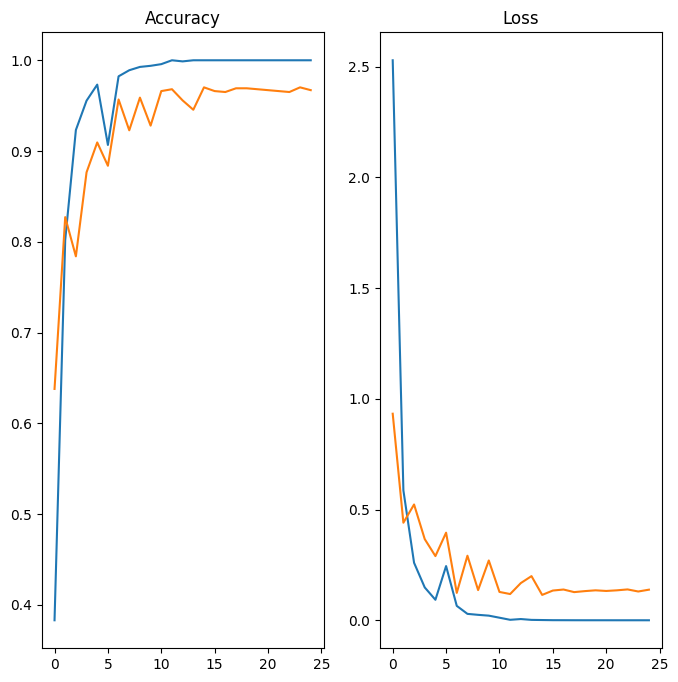

In [ ]:
epochs_size = 25
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'], label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

## Now let's print the summary of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

# Predictiong Value from model

In [ ]:
image = "/content/drive/MyDrive/fish_dataset/pabda.jpg"
image = tf.keras.utils.load_img(image,target_size= (img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 38ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Fish in image is {} with accuracy of {:0.2f}' .format(data_cat[np.argmax(score)],np.max(score)*100))

Fish in image is Pabda with accuracy of 100.00


In [ ]:
model.save("/content/drive/MyDrive/fish_dataset/saved_model/")

In [ ]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com
! streamlit run app.py & npx localtunnel --port 8501

35.199.173.121
[..................] / fetchMetadata: sill resolveWithNewModule localtunnel@2.0

npx: installed 22 in 2.308s
your url is: https://small-pumas-eat.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.199.173.121:8501

2023-11-13 00:10:12.755602: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 00:10:12.755667: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 00:10:12.755706: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 00:10:13.739660: W tensorflow/compiler/tf2

In [ ]:
image_path = '/content/drive/MyDrive/fish_dataset/kholse.jpg'
image_load = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))


In [ ]:
import cv2

In [ ]:
image= cv2.imread('/content/drive/MyDrive/fish_dataset/kholse.jpg')[:,:,0]
image=np.invert(np.array([image]))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
import os


In [ ]:
import streamlit as st
import tensorflow as tf
import cv2
import numpy as np

In [ ]:
# Assuming 'model' is your Keras model
model_path = "/content/drive/MyDrive/fish_dataset/model_saved/"
model.save(model_path)


In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/fish_dataset/model_saved/")


In [ ]:
if __name__ == '__main__':
    st.set_option('browser.gatherUsageStats', False)
    st.beta_set_page_config(layout="wide")
    st.set_page_config(
         page_title="Fish Classifier App",
         page_icon="🐟",
         layout="wide",
     )
    st.run_page()
